# Project:-Hotel Review Sentiment-Analysis

in this project we are again using NLTK library for text processing

#### Aim- Sentiment Analysis for Hotel reviews and predicting Ratings

Data Loading

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv')

In [51]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


### Any missing Values?

In [53]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [54]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [55]:
df.shape

(20491, 2)

In [56]:
import seaborn as sns

In [57]:
import matplotlib.pyplot as plt

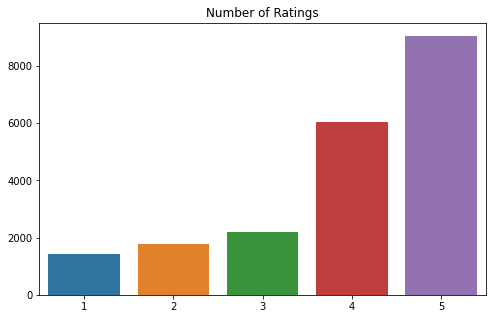

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Rating'].value_counts().index.values,y=df['Rating'].value_counts().values)
plt.title("Number of Ratings")
plt.show()

### Text Preprocessing

1.Removing Punctuations


3.Removing Stopwords

4.Vectorization

5.TF-IDF and BOW

In [59]:
import string
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
len(df['Review'].head()[3])

600

creating a Function which can removes stopwords and punctuations

In [61]:
def text_process(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
#     return joined

In [62]:
df['Review'][:5].apply(text_process)

0    [nice, hotel, expensive, parking, got, good, d...
1    [ok, nothing, special, charge, diamond, member...
2    [nice, rooms, 4, experience, hotel, monaco, se...
3    [unique, great, stay, wonderful, time, hotel, ...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

In [44]:
df.shape

(20491, 2)

## Vectorization

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
bow_transformer= CountVectorizer(analyzer=text_process).fit(df['Review'])
print(len(bow_transformer.vocabulary_))

81408


In [67]:
text_bow = bow_transformer.transform(df['Review'])
print(text_bow.shape)

(20491, 81408)


### TF-IDF 

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
tfidff_transformer = TfidfTransformer().fit(text_bow)

In [75]:
text_tfidf = tfidff_transformer.transform(text_bow)

In [78]:
print(text_tfidf[0])

  (0, 80136)	0.14997376830989956
  (0, 78149)	0.07604764010275043
  (0, 77537)	0.06898075004440168
  (0, 76980)	0.12327203957099309
  (0, 73692)	0.11101361282108378
  (0, 73466)	0.07883631153441469
  (0, 70917)	0.1308197335437347
  (0, 70875)	0.10761447985607135
  (0, 68860)	0.1877295303624301
  (0, 68615)	0.08034680983743865
  (0, 68556)	0.08442824518472036
  (0, 67119)	0.17492825053456154
  (0, 65815)	0.0856112483015523
  (0, 64918)	0.08660897203496473
  (0, 61740)	0.1021307490251541
  (0, 61027)	0.07150618696518371
  (0, 57945)	0.10499662661700991
  (0, 57041)	0.13950939315244396
  (0, 56545)	0.10929257360225685
  (0, 54643)	0.11325072179658602
  (0, 53896)	0.06433994970806094
  (0, 53616)	0.08816181780168007
  (0, 53208)	0.2901347372376981
  (0, 52302)	0.08295340457412478
  (0, 51490)	0.14329842019602199
  :	:
  (0, 33863)	0.040045023948359126
  (0, 33582)	0.06410731644280895
  (0, 33347)	0.044299977909933695
  (0, 33298)	0.20315588529755654
  (0, 28438)	0.07532679606440314
  (0, 2

In [80]:
print(tfidff_transformer.idf_[bow_transformer.vocabulary_['wife']])

3.7716132075784774


In [81]:
#now apply to the whole datafram
text_tfidf=tfidff_transformer.transform(text_bow)
print(text_tfidf.shape)

(20491, 81408)


In [84]:
X = text_tfidf
y= df['Rating']

In [85]:
X.shape, y.shape

((20491, 81408), (20491,))

### Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Model Building

##### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
predictions = model.predict(X_test)

In [92]:
predictions[:10]

array([5, 5, 5, 5, 5, 5, 5, 5, 3, 5], dtype=int64)

In [93]:
y_test[:10]

18826    5
9983     5
18770    5
2567     5
4314     5
6200     4
14034    5
15780    4
5604     3
16756    5
Name: Rating, dtype: int64

#### Model Evaluation

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.68      0.58      0.63       424
           2       0.49      0.36      0.41       532
           3       0.47      0.20      0.28       663
           4       0.50      0.51      0.50      1808
           5       0.69      0.83      0.76      2721

    accuracy                           0.61      6148
   macro avg       0.57      0.50      0.52      6148
weighted avg       0.59      0.61      0.59      6148



In [96]:
print(confusion_matrix(y_test, predictions))

[[ 248  105   17   21   33]
 [  91  190   73  114   64]
 [  18   75  131  341   98]
 [   5   18   52  916  817]
 [   3    1    5  440 2272]]
